# Домашняя работа №1

In [135]:
import cv2
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [137]:
def plot_two_images(image1: np.ndarray, image2: np.ndarray) -> None:
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))  # 1 строка, 2 столбца
    
    axs[0].imshow(image1)
    axs[0].axis('off')
    
    axs[1].imshow(image2)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

Оценивается __каждое__ успешное решение лабиринта.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [222]:
def find_way_from_maze(image: np.ndarray) -> tuple:
    """
    Найти путь через лабиринт.

    :param image: изображение лабиринта
    :return: координаты пути из лабиринта в виде (x, y), где x и y - это массивы координат
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)
    height, width = binary_mask.shape
    start_point = None
    end_point = None
    
    for i in range(height):
        for j in range(width):
            if binary_mask[i, j] == 0:
                start_point = (i, j)
                break
        if start_point is not None:
            break

    for i in range(height - 1, -1, -1):
        for j in range(width - 1, -1, -1):
            if binary_mask[i, j] == 0:
                end_point = (i, j)
                break
        if end_point is not None:
            break

    if start_point is None or end_point is None:
        return None

    movements = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    queue = deque([start_point])
    visited_nodes = set()
    visited_nodes.add(start_point)
    parent_map = {start_point: None}

    while queue:
        current_node = queue.popleft()
        if current_node == end_point:
            break
        for move in movements:
            neighbor_node = (current_node[0] + move[0], current_node[1] + move[1])
            if (0 <= neighbor_node[0] < height and
                0 <= neighbor_node[1] < width and
                binary_mask[neighbor_node] == 0 and
                neighbor_node not in visited_nodes):

                visited_nodes.add(neighbor_node)
                queue.append(neighbor_node)
                parent_map[neighbor_node] = current_node

    coords = []
    step = end_point

    while step is not None:
        coords.append(step)
        step = parent_map.get(step)
        
    coords.reverse()
    x_coords, y_coords = ([], [])
    if coords:
        x_coords, y_coords = zip(*coords)
        
    return (x_coords, y_coords)

In [215]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.
     
    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

Загрузим тестовое изображение и отобразим его.

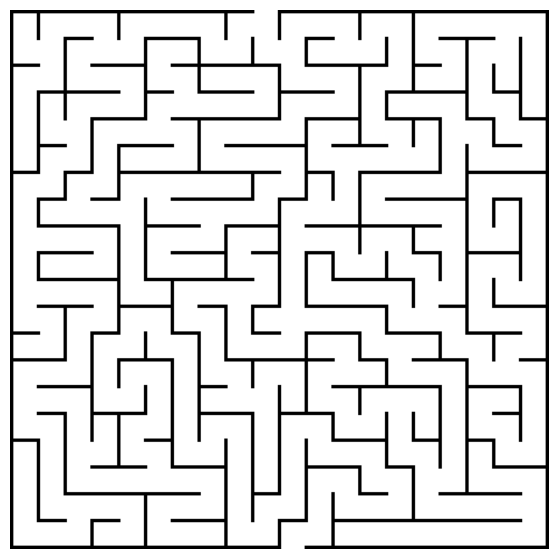

In [216]:
test_image = cv2.imread('task_1/20 by 20 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

Теперь ваша задача реализовать функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

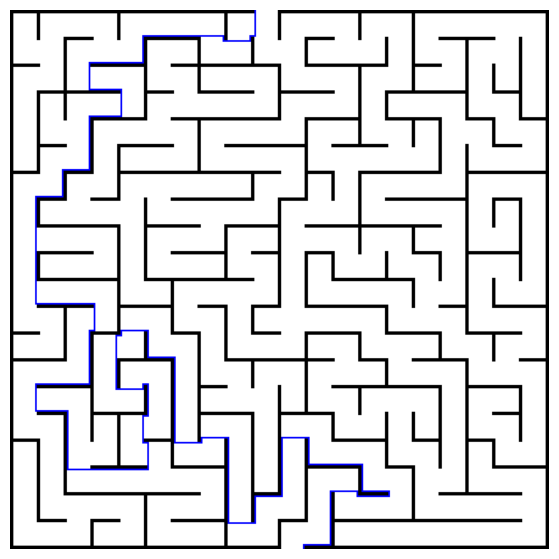

In [217]:
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

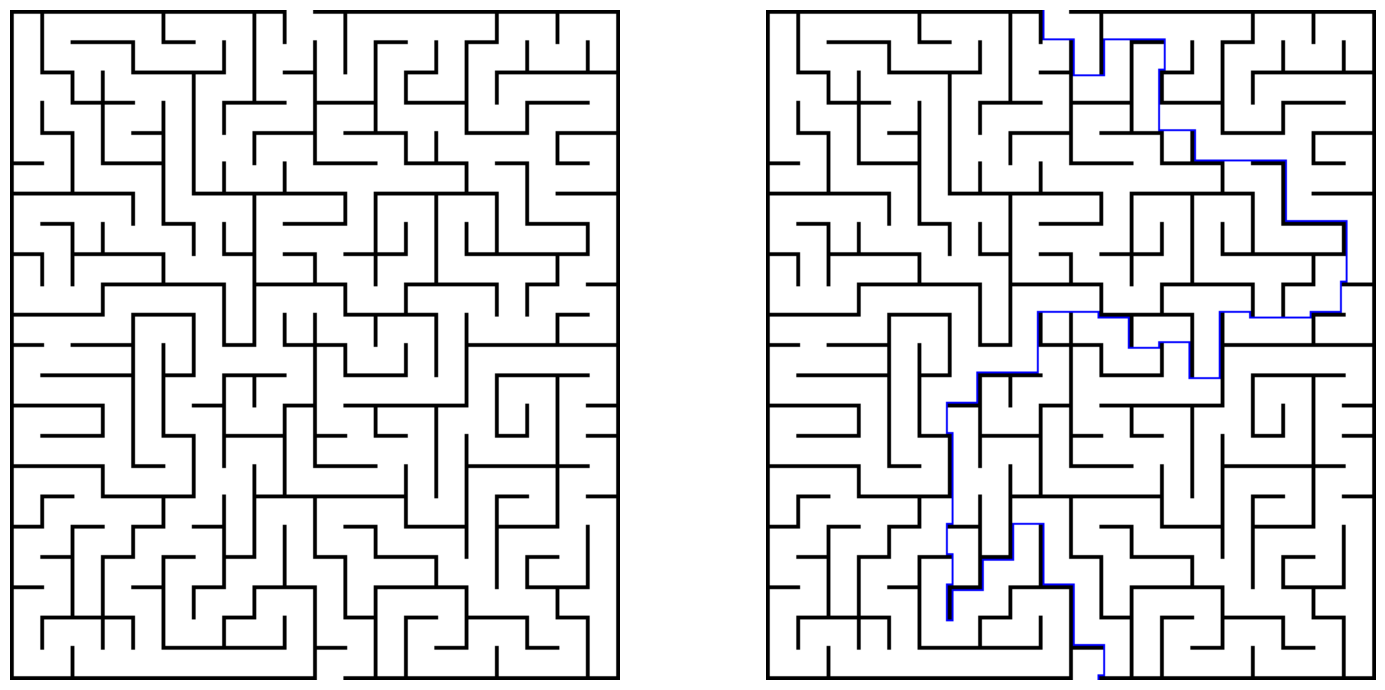

In [218]:
test_image = cv2.imread('task_1/20 by 22 orthogonal maze.png')  # загрузить тестовую картинку

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

image_with_way = plot_maze_path(test_image, way_coords)

plot_two_images(test_image, image_with_way)

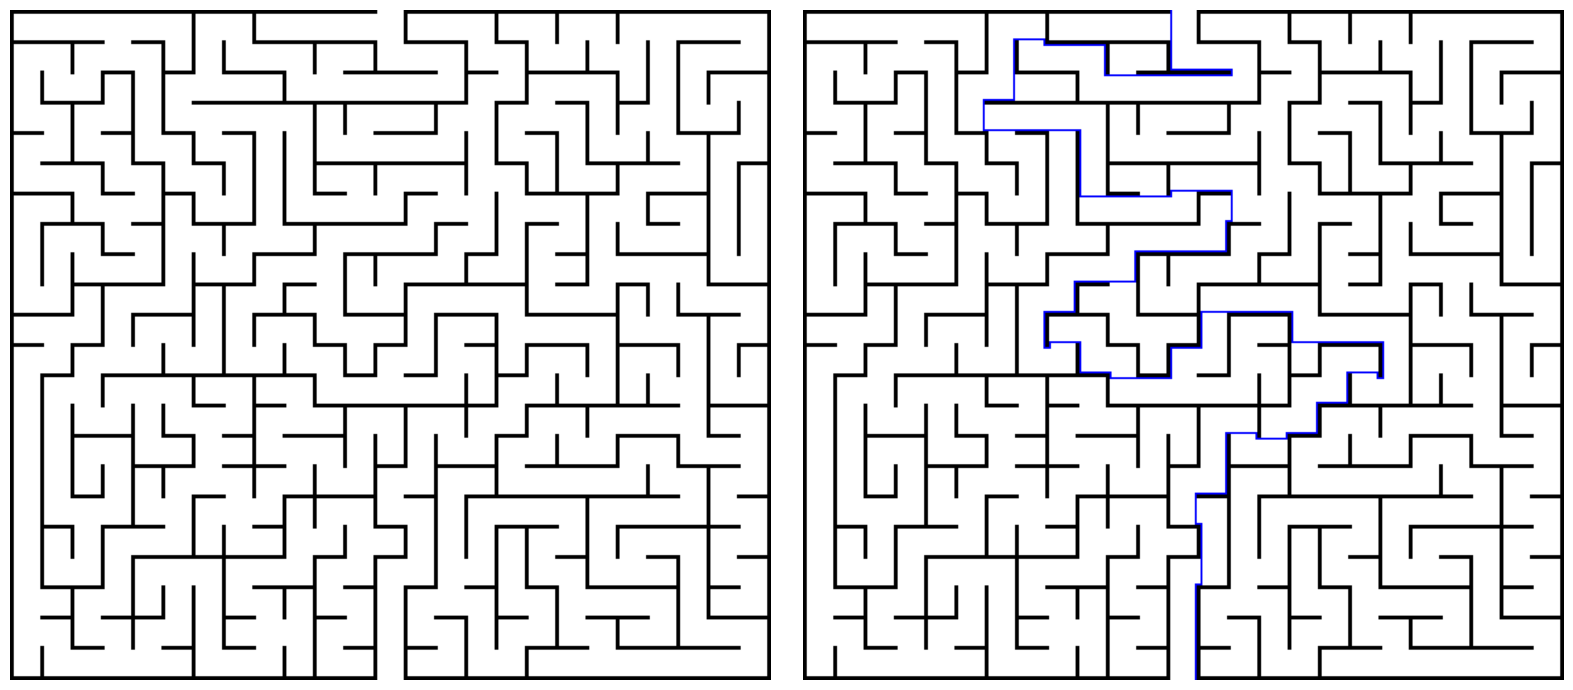

In [219]:
test_image = cv2.imread('task_1/25 by 22 orthogonal maze.png')  # загрузить тестовую картинку

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

image_with_way = plot_maze_path(test_image, way_coords)

plot_two_images(test_image, image_with_way)

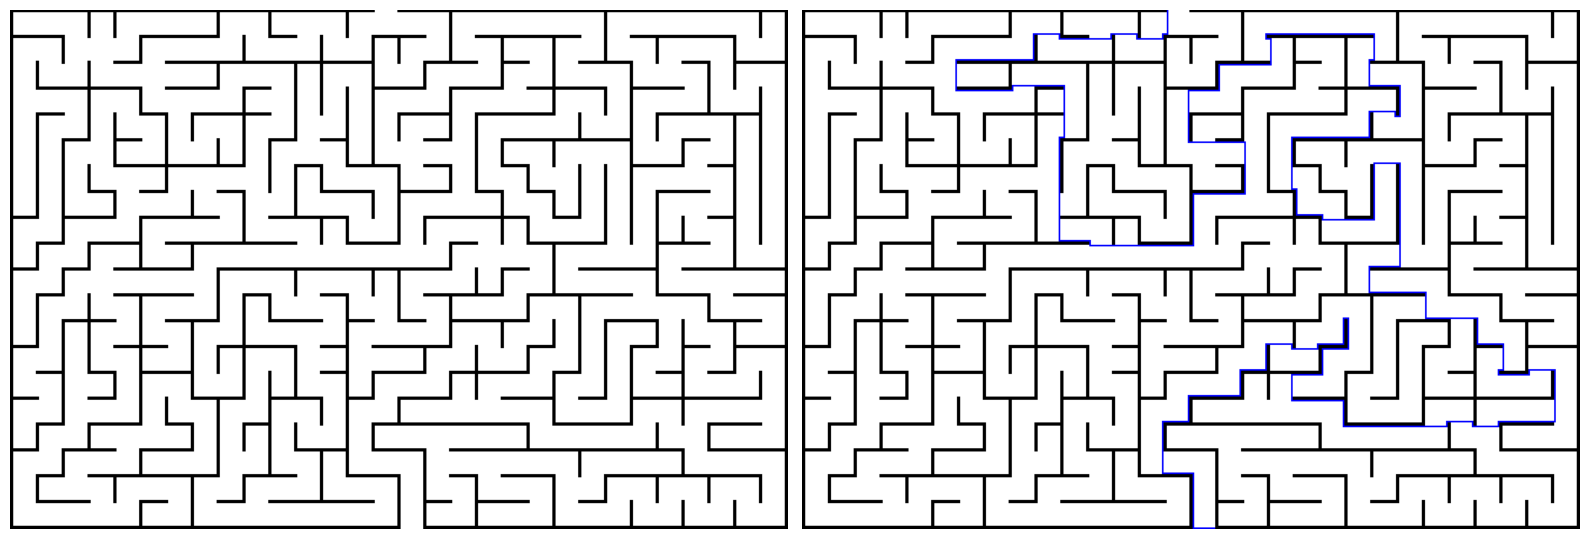

In [220]:
test_image = cv2.imread('task_1/30 by 20 orthogonal maze.png')  # загрузить тестовую картинку

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

image_with_way = plot_maze_path(test_image, way_coords)

plot_two_images(test_image, image_with_way)

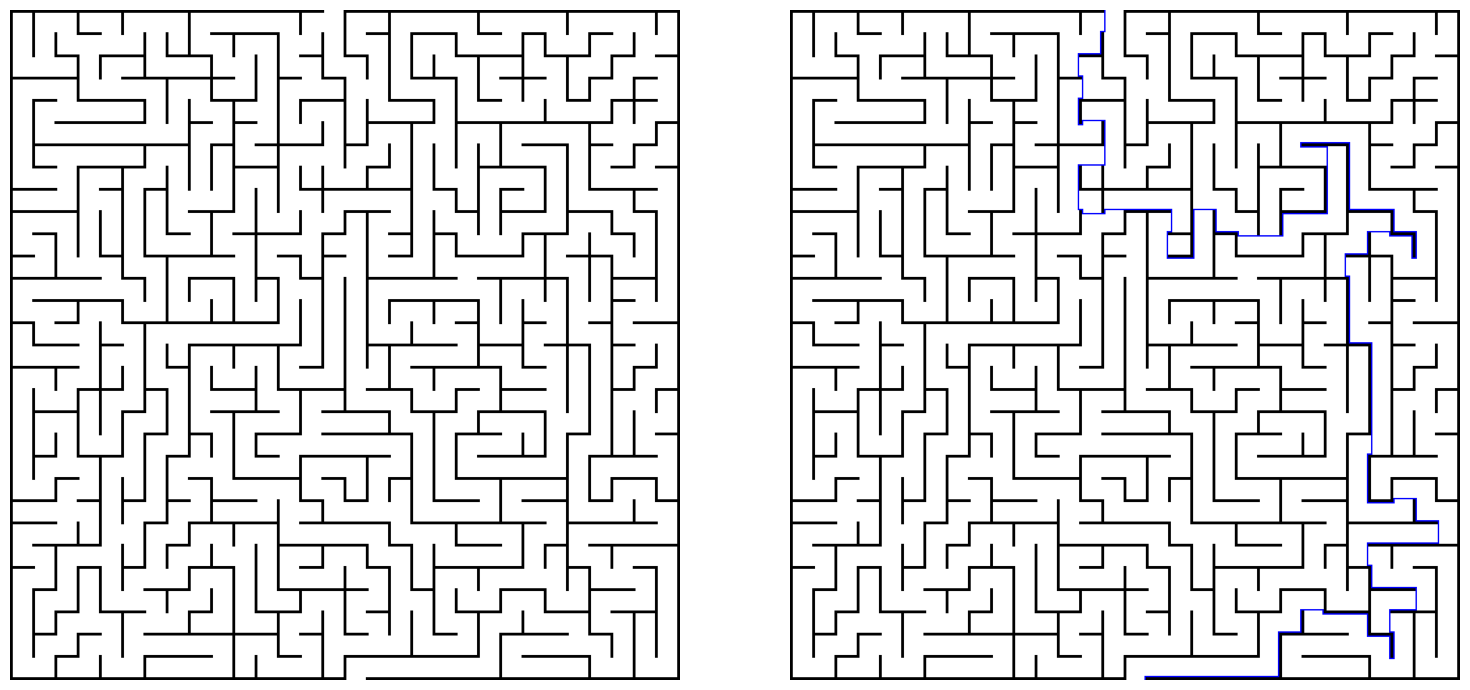

In [221]:
test_image = cv2.imread('task_1/30 by 30 orthogonal maze.png')  # загрузить тестовую картинку

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

image_with_way = plot_maze_path(test_image, way_coords)

plot_two_images(test_image, image_with_way)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [226]:
def find_road_number(image: np.ndarray) -> int:
    """
    Найти номер дороги, на которой нет препятсвия в конце пути.

    :param image: исходное изображение
    :return: номер дороги, на котором нет препятсвия на дороге
    """
    road_number = None
    gray_lower = (200, 200, 200)
    gray_upper = (220, 220, 220)
    red_lower = (230, 0, 0)
    red_upper = (255, 50, 50)
    
    gray_mask = cv2.inRange(image, gray_lower, gray_upper)
    red_mask = cv2.inRange(image, red_lower, red_upper)
    
    contours_gray, _ = cv2.findContours(gray_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_gray = contours_gray[::-1]
    
    road_number = None
    for i, contour in enumerate(contours_gray):
        x, y, w, h = cv2.boundingRect(contour)
        road_region = red_mask[y:y+h, x:x+w]
        if np.sum(road_region) == 0:
            road_number = i + 1
            break
            
    return road_number

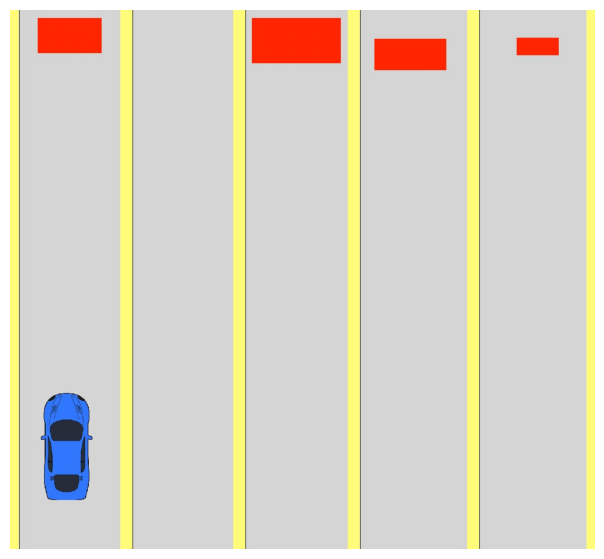

In [151]:
test_image = cv2.imread('task_2/image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [152]:
road_number = find_road_number(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 2


Нужно перестроиться на дорогу номер 4


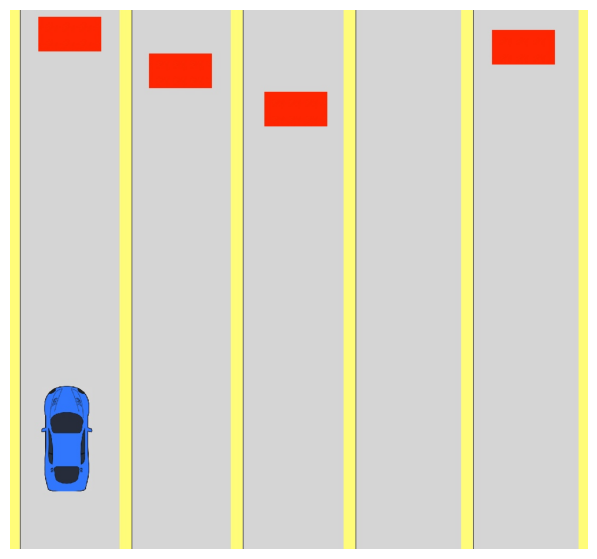

In [224]:
test_image = cv2.imread('task_2/image_01.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
road_number = find_road_number(test_image)
print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 1


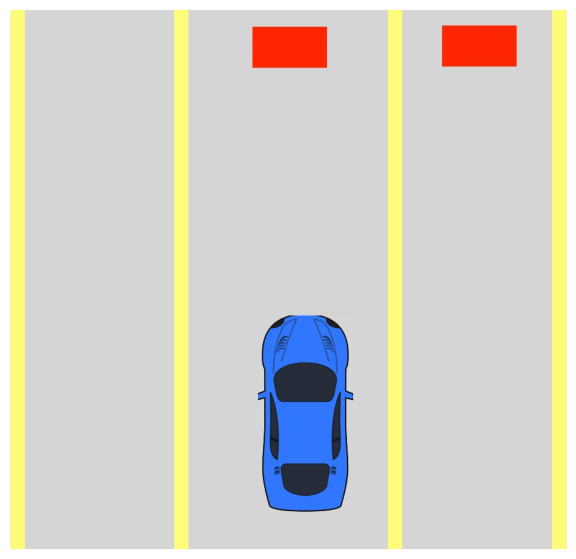

In [225]:
test_image = cv2.imread('task_2/image_02.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
road_number = find_road_number(test_image)
print(f'Нужно перестроиться на дорогу номер {road_number}')

# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [228]:
def rotate(image, point: tuple, angle: float) -> np.ndarray:
    """
    Повернуть изображение по часовой стрелке на угол от 0 до 360 градусов и преобразовать размер изображения.

    :param image: исходное изображение
    :param point: значение точки (x, y), вокруг которой повернуть изображение
    :param angle: угол поворота
    :return: повернутное изображение
    """
    img_height, img_width = image.shape[:2]
    img_center = (img_width / 2, img_height / 2)
    matrix = cv2.getRotationMatrix2D(img_center, angle, scale=1.0)

    cos_val = abs(matrix[0, 0])
    sin_val = abs(matrix[0, 1])

    new_image_width = int(img_height * sin_val + img_width * cos_val)
    new_image_height = int(img_height * cos_val + img_width * sin_val)

    matrix[0, 2] += new_image_width / 2 - img_center[0]
    matrix[1, 2] += new_image_height / 2 - img_center[1]

    rotated_image = cv2.warpAffine(image, matrix, (new_image_width, new_image_height))
    return rotated_image

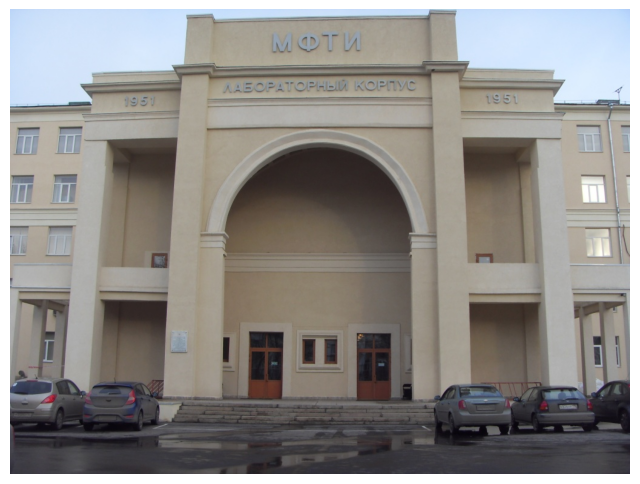

In [229]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

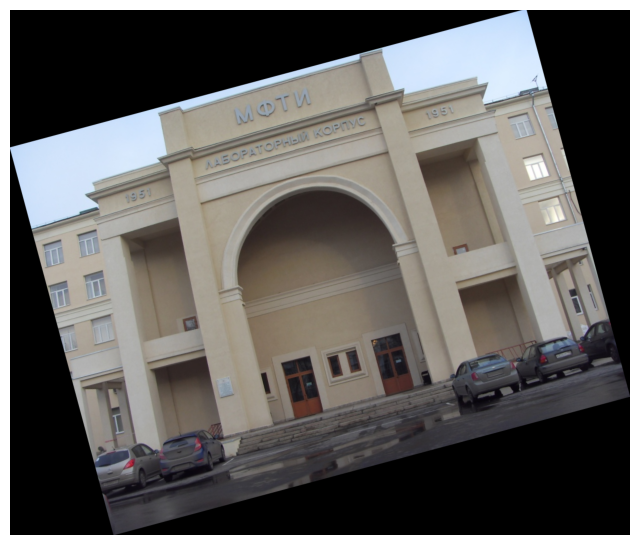

In [230]:
test_point = (200, 200)
test_angle = 15

transformed_image = rotate(test_image, test_point, test_angle)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

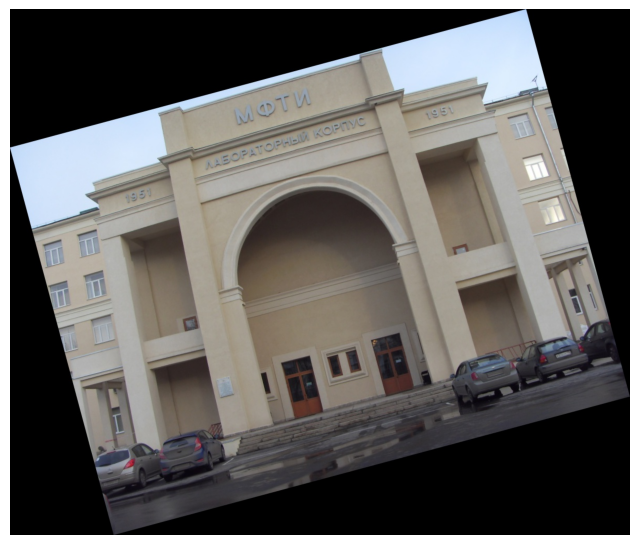

In [231]:
result_image = cv2.imread('task_3/lk_rotate.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)

## Задача №3.2 - Афинные преобразования

Реализуйте функцию, которая применяет афинное преобразование между заданными точками на исходном изображении и преобразует размер получившегося изображения, чтобы оно не обрезалось.

In [232]:
def apply_warpAffine(image, points1, points2) -> np.ndarray:
    """
    Применить афинное преобразование согласно переходу точек points1 -> points2 и
    преобразовать размер изображения.

    :param image:
    :param points1:
    :param points2:
    :return: преобразованное изображение
    """
    matrix = cv2.getAffineTransform(points1, points2)
    img_height, img_width = image.shape[:2]

    corners = np.array([
        [0, 0, 1],
        [0, img_height, 1],
        [img_width, 0, 1],
        [img_width, img_height, 1]
    ])
    new_corners = np.dot(matrix, corners.T).T

    x_min = np.min(new_corners[:, 0])
    x_max = np.max(new_corners[:, 0])
    y_min = np.min(new_corners[:, 1])
    y_max = np.max(new_corners[:, 1])

    matrix[0, 2] -= x_min
    matrix[1, 2] -= y_min

    transformed_image = cv2.warpAffine(image, matrix, (round(x_max - x_min), round(y_max - y_min)))
    return transformed_image

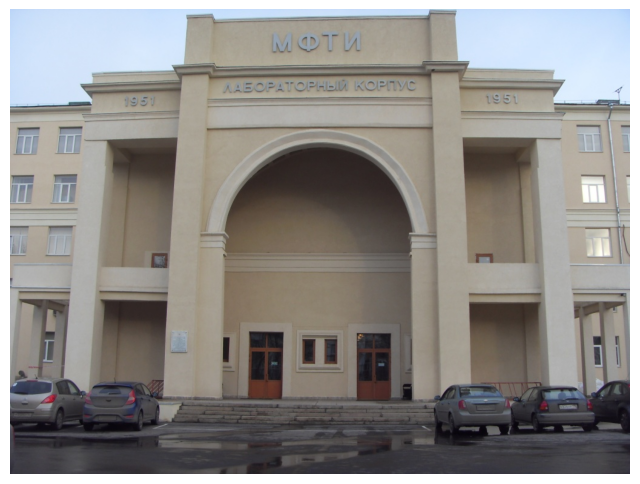

In [233]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

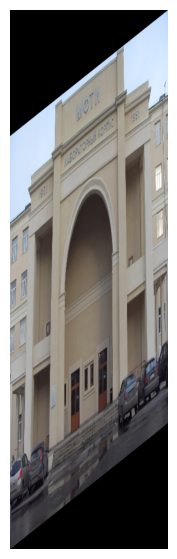

In [234]:
test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]]) 

transformed_image = apply_warpAffine(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

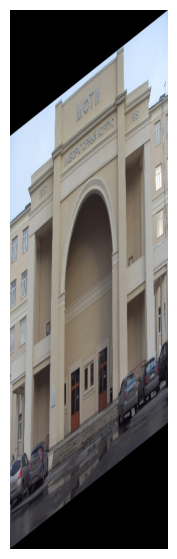

In [235]:
result_image = cv2.imread('task_3/lk_affine.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)